In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import re
import warnings
from collections import Counter
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn import preprocessing
from sklearn.model_selection import RandomizedSearchCV
from pprint import pprint
from sklearn.ensemble import GradientBoostingRegressor
import math

In [2]:
df=pd.read_csv('eda_dataset.csv')
df.head(10)

,VIN,brand,model,trim,manufacture_year,mileage,transmission,drive_type,fuel_type,exterior_color,interior_color,accidents,owners,car_usage_type,price,car_age,state,MPG
0,5FPYK3F6XHB002417,Honda,Ridgeline,RTL-T AWD,2017,101576,Automatic,AWD,Gas,Silver,Gray,0,3,Personaluse,25499,5,IN,21.5
1,JTDKN3DP4C3008964,Toyota,Prius,Plug-in Hybrid Advanced,2012,65082,Automatic,FWD,Hybrid,Gray,Gray,0,1,Personaluse,20990,10,CA,50.0
2,SADCJ2FX7JA258056,Jaguar,F-PACE,Premium 25t,2018,29717,Automatic,AWD,Gas,White,Black,0,1,Personaluse,38625,4,NC,24.5
3,3FA6P0HR3DR138619,Ford,Fusion,SE FWD,2013,154044,Automatic,FWD,Gas,White,Black,0,2,Personaluse,7399,9,CA,28.0
4,JTJHT00WX64011715,Lexus,LX,LX 470,2006,224550,Automatic,4WD,Gas,Black,Red,1,1,Personaluse,14500,16,ID,15.0
5,5N1AT2MT1KC770345,Nissan,Rogue,S FWD,2019,151343,Automatic,FWD,Gas,Gray,Black,1,1,Personaluse,13881,3,ID,29.5
6,WDDHF8JB5EA812014,Mercedes-Benz,E-Class,E 350 4MATIC Luxury Sedan,2014,104220,Automatic,AWD,Gas,White,Black,1,3,Personaluse,17995,8,TX,25.0
7,1FTMF1CM9DKD84939,Ford,F-150,STX Reg Cab 6.5' Box 2WD,2013,165239,Automatic,RWD,Gas,White,Black,2,3,Fleetuse,9995,9,GA,20.0
8,2C4RDGCG3KR544465,Dodge,Grand Caravan,SXT,2019,18467,Automatic,FWD,Gas,White,Black,1,4,Fleetuse,26000,3,TX,21.0
9,KNMAT2MV7KP553686,Nissan,Rogue,SV AWD,2019,65126,Automatic,AWD,Gas,Black,Black,0,1,Fleetuse,22997,3,TX,28.5


In [3]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [4]:
df=df.drop(['VIN'],axis=1)

### Finding feature importance to determine necessary features

In [5]:
## Deleting manufacture year because we already have a similar column called car age
df=df.drop(['trim','manufacture_year'],axis=1)

(array([2.439e+03, 3.385e+03, 2.187e+03, 1.202e+03, 4.470e+02, 1.490e+02,
        5.400e+01, 2.400e+01, 8.000e+00, 3.000e+00]),
 array([5.000000e+00, 2.662740e+04, 5.324980e+04, 7.987220e+04,
        1.064946e+05, 1.331170e+05, 1.597394e+05, 1.863618e+05,
        2.129842e+05, 2.396066e+05, 2.662290e+05]),
 <BarContainer object of 10 artists>)

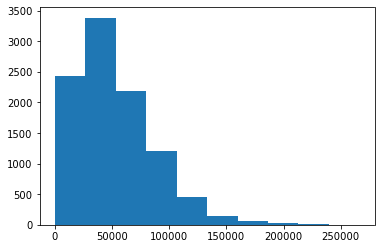

In [6]:
# Because of the skewness of mileage
plt.hist((df["mileage"]))

(array([2.000e+00, 6.000e+00, 1.000e+01, 9.000e+00, 3.800e+01, 1.100e+02,
        4.900e+02, 2.219e+03, 5.668e+03, 1.346e+03]),
 array([ 1.60943791,  2.69770533,  3.78597275,  4.87424017,  5.9625076 ,
         7.05077502,  8.13904244,  9.22730986, 10.31557728, 11.4038447 ,
        12.49211212]),
 <BarContainer object of 10 artists>)

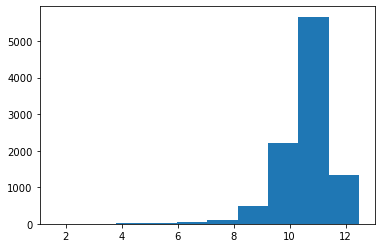

In [7]:
plt.hist(np.log(df['mileage']))

### Does not normal distribution in any way so we continue with mileage column only

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9898 entries, 0 to 9897
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   brand           9898 non-null   object 
 1   model           9898 non-null   object 
 2   mileage         9898 non-null   int64  
 3   transmission    9898 non-null   object 
 4   drive_type      9898 non-null   object 
 5   fuel_type       9898 non-null   object 
 6   exterior_color  9898 non-null   object 
 7   interior_color  9898 non-null   object 
 8   accidents       9898 non-null   int64  
 9   owners          9898 non-null   int64  
 10  car_usage_type  9898 non-null   object 
 11  price           9898 non-null   int64  
 12  car_age         9898 non-null   int64  
 13  state           9898 non-null   object 
 14  MPG             9898 non-null   float64
dtypes: float64(1), int64(5), object(9)
memory usage: 1.1+ MB


### Feature Selection

In [9]:
from sklearn.feature_selection import SelectKBest, mutual_info_regression

In [10]:
from sklearn.preprocessing import LabelEncoder
temp_data = df.copy()
for col in temp_data.columns:
    if temp_data[col].dtypes == 'object':
        encoder = LabelEncoder()
        temp_data[col] = encoder.fit_transform(temp_data[col])

In [11]:
# X_temp = temp_data.drop(['price','mileage'], axis=1)
X_temp = temp_data.drop(['price'], axis=1)
y_temp = np.log(temp_data['price'].values)

In [12]:
# selecting top 8 features
selector = SelectKBest(mutual_info_regression, k=10)
selector.fit(X_temp,y_temp)
X_temp.columns[selector.get_support()]

Index(['brand', 'model', 'mileage', 'drive_type', 'fuel_type',
       'interior_color', 'owners', 'car_usage_type', 'car_age', 'MPG'],
      dtype='object')

In [13]:
df=df.drop(['car_usage_type','interior_color','exterior_color','state','transmission','MPG'],axis=1)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9898 entries, 0 to 9897
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   brand       9898 non-null   object
 1   model       9898 non-null   object
 2   mileage     9898 non-null   int64 
 3   drive_type  9898 non-null   object
 4   fuel_type   9898 non-null   object
 5   accidents   9898 non-null   int64 
 6   owners      9898 non-null   int64 
 7   price       9898 non-null   int64 
 8   car_age     9898 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 696.1+ KB


## Predictive Analysis

In [15]:
num_feat = df.drop(['price'], axis=1).select_dtypes(include=np.number).columns
cat_feat = df.drop('price', axis=1).select_dtypes(include=['object']).columns

In [16]:
X = df.drop(['price'], axis=1)
y = np.log(df['price'].values)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [17]:
X.head()

,brand,model,mileage,drive_type,fuel_type,accidents,owners,car_age
0,Honda,Ridgeline,101576,AWD,Gas,0,3,5
1,Toyota,Prius,65082,FWD,Hybrid,0,1,10
2,Jaguar,F-PACE,29717,AWD,Gas,0,1,4
3,Ford,Fusion,154044,FWD,Gas,0,2,9
4,Lexus,LX,224550,4WD,Gas,1,1,16


### PIPELINE

In [18]:
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler()) ])

categorical_transformer = Pipeline(steps=[
    ('one_hot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, num_feat),
        ('cat', categorical_transformer, cat_feat)
    ])

## Linear Regression

In [19]:
pipe = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier',  LinearRegression())
])

model_lin = pipe.fit(X_train, y_train)
y_pred_train = model_lin.predict(X_train)
y_pred_test = model_lin.predict(X_test)

model_lin.score(X_test, y_test)

0.9103768105156289

In [20]:
pipe

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  Index(['mileage', 'accidents', 'owners', 'car_age'], dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('one_hot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['brand', 'model', 'drive_type', 'fuel_type'], dtype='object'))])),
                ('classifier', LinearRegression())])

In [21]:
model_lin

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  Index(['mileage', 'accidents', 'owners', 'car_age'], dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('one_hot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['brand', 'model', 'drive_type', 'fuel_type'], dtype='object'))])),
                ('classifier', LinearRegression())])

Mostly 90% of times the model would predict a correct value

In [22]:
rmse_train = np.sqrt(mean_squared_error(np.exp(y_train),np.exp(y_pred_train)))
print(f'Root Mean Square Error Linear Regression: {rmse_train}')

Root Mean Square Error Linear Regression: 4567.088784726255


In [23]:
# Checking RMSE for this model
rmse_test = np.sqrt(mean_squared_error(np.exp(y_test),np.exp(y_pred_test)))
print(f'Root Mean Square Error Linear Regression: {rmse_test}')

Root Mean Square Error Linear Regression: 5320.407529399374


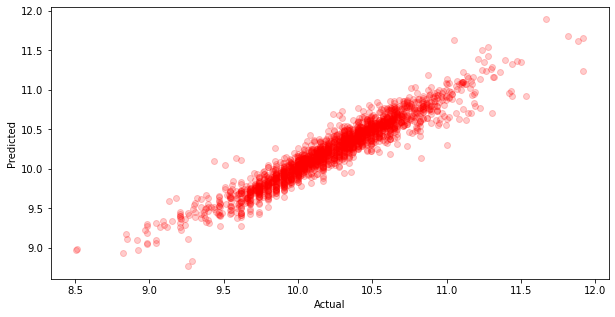

In [24]:
plt.figure(figsize=(10,5))
plt.plot(y_test, y_pred_test,'ro',alpha=0.2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

Our training dataset looks very good, though its not completely random, there is linearity in the plot

### Residual plot

Text(0.5, 1.0, 'Residual plot for linear regression training model')

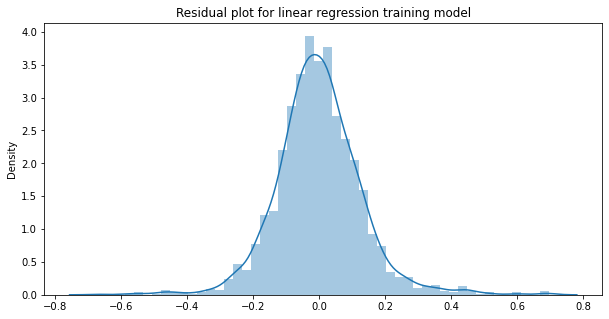

In [25]:
residual_plot = (y_test - y_pred_test)
plt.figure(figsize=(10,5))
sns.distplot(residual_plot);
plt.title('Residual plot for linear regression training model')

1. Most of the values lie in and around zero which is very good. 
2. From this model we can interpret that sometime when car price would be less this model might predict wrong because mean square error is 5911 approx

## RANDOM FOREST MODEL

In [26]:
pipe_rf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier',   RandomForestRegressor())
])

model_rf = pipe_rf.fit(X_train, y_train)

y_pred_rf_train = model_rf.predict(X_train)
y_pred_rf_test = model_rf.predict(X_test)

print('Training set score: ' + str(model_rf.score(X_train, y_train)))
print('Test set score: ' + str(model_rf.score(X_test, y_test)))

Training set score: 0.978587390801846
Test set score: 0.8547538504606369


In [27]:
rmse_rf_train = np.sqrt(mean_squared_error(np.exp(y_train),np.exp(y_pred_rf_train)))
print(f'Root Mean Square Error RF Model for train data: {rmse_rf_train}')

Root Mean Square Error RF Model for train data: 3200.7525205796196


In [28]:
rmse_rf_test = np.sqrt(mean_squared_error(np.exp(y_test),np.exp(y_pred_rf_test)))
print(f'Root Mean Square Error Random Forest wt Onehotencoding: {rmse_rf_test}')

Root Mean Square Error Random Forest wt Onehotencoding: 6984.613231692881


### Hyper Tuning the RF model Grid Search CV

The above model was overfitting for training data so we go ahead with hypertuning the model

In [29]:
param_grid = [{'classifier__n_estimators': [10, 25], 
               'classifier__max_features': ['auto', 'sqrt', 'log2'],
 'classifier__max_depth': [10, 50, None]}]
# param_grid = [{'classifier__n_estimators': [10, 25], 
#                #'classifier__max_features': [5, 10], 
#  'classifier__max_depth': [2,4,6,8, None]}]

In [30]:
# Hypertuning this model
model_rf_gsc = GridSearchCV(pipe_rf, param_grid, cv=10, scoring='neg_mean_squared_error')

In [31]:
model_rf_gsc.fit(X_train, y_train)
model_rf_gsc.best_params_

{'classifier__max_depth': 50,
 'classifier__max_features': 'sqrt',
 'classifier__n_estimators': 25}

In [32]:
y_pred_rf_gsc_train = model_rf_gsc.predict(X_train)

In [33]:
y_pred_rf_gsc_test = model_rf_gsc.predict(X_test)

In [34]:
r2_score(y_train, y_pred_rf_gsc_train )

0.968211499174624

In [35]:
r2_score(y_test, y_pred_rf_gsc_test )

0.8602464897067053

In [36]:
rmse_rf_gsc_train = np.sqrt(mean_squared_error(np.exp(y_train),np.exp(y_pred_rf_gsc_train)))
print(f'Root Mean Square Error RF-GSC-Train: {rmse_rf_gsc_train}')

Root Mean Square Error RF-GSC-Train: 3582.78979142673


In [37]:
rmse_rf_gsc_test = np.sqrt(mean_squared_error(np.exp(y_test),np.exp(y_pred_rf_gsc_test)))
print(f'Root Mean Square Error RF-GSC-Test: {rmse_rf_gsc_test}')

Root Mean Square Error RF-GSC-Test: 6637.377565555484


Random forest has better performance when compared to Linear Regression Model. Now next for this model we would not induce one hot encoding because we all know that random forest classifier is sensitive to one hot encoding if we induce one-hot to a decision tree splitting can result in sparse decision tree. The trees generally tend to grow in one direction because at every split of a categorical variable there are only two values (0 or 1). The tree grows in the direction of zeroes in the dummy variables.

### Now using label encoder with RF model

In [38]:
X_rf = X_temp.drop(['car_usage_type','interior_color','exterior_color','state','transmission'], axis=1)
y_rf = df['price'].values

In [39]:
X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(X_rf, y_rf, test_size=0.2)

In [40]:
pipe_rf_base = Pipeline([
# ('scaler', StandardScaler()),
('classifier', RandomForestRegressor())])

In [41]:
model_rf_2 = pipe_rf_base.fit(X_train_rf, y_train_rf)
y_pred_rf_2_train = model_rf_2.predict(X_train_rf)
y_pred_rf_2_test = model_rf_2.predict(X_test_rf)
print('Training set score: ' + str(pipe_rf_base.score(X_train_rf,y_train_rf)))
print('Test set score: ' + str(pipe_rf_base.score(X_test_rf,y_test_rf)))

Training set score: 0.9752299797424665
Test set score: 0.7569238404440914


In [42]:
rmse_rf_2_train = np.sqrt(mean_squared_error(y_train_rf,y_pred_rf_2_train))
print(f'Root Mean Square Error RF model with lc for train data: {rmse_rf_2_train}')

Root Mean Square Error RF model with lc for train data: 2226.5980674797106


In [43]:
rmse_rf_2_test = np.sqrt(mean_squared_error(y_test_rf,y_pred_rf_2_test))
print(f'Root Mean Square Error RF model with lc for test data: {rmse_rf_2_test}')

Root Mean Square Error RF model with lc for test data: 8118.851348818988


### Hyper Tuning this model with Grid Search CV

In [44]:
model_rf_3 = GridSearchCV(pipe_rf_base, param_grid, cv=10)

In [45]:
model_rf_3.fit(X_train_rf, y_train_rf)
model_rf_3.best_params_

{'classifier__max_depth': 50,
 'classifier__max_features': 'auto',
 'classifier__n_estimators': 25}

In [46]:
y_pred_hpr_rf_train = model_rf_3.predict(X_train_rf)

In [47]:
y_pred_hpr_rf_test = model_rf_3.predict(X_test_rf)

In [48]:
r2_score(y_test_rf, y_pred_hpr_rf_test )

0.7567791159939649

In [49]:
rmse_rf_hpr_train = np.sqrt(mean_squared_error(y_train_rf,y_pred_hpr_rf_train))
print(f'Root Mean Square Error RF-HPR-Train: {rmse_rf_hpr_train}')

Root Mean Square Error RF-HPR-Train: 2442.531042410945


In [50]:
rmse_rf_hpr_test = np.sqrt(mean_squared_error(y_test_rf,y_pred_hpr_rf_test))
print(f'Root Mean Square Error RF-HPR-Test: {rmse_rf_hpr_test}')

Root Mean Square Error RF-HPR-Test: 8121.267919528454


Hypertuning the model with Grid Search Cross validation is not imporving RMSE by much now we will try Random SearchCV

### Randomized SearchCV with RF model

In [51]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 20, stop = 200, num = 5)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(1, 45, num = 3)]
# Minimum number of samples required to split a node
min_samples_split = [5, 10]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split}

pprint(random_grid)

{'max_depth': [1, 23, 45],
 'max_features': ['auto', 'sqrt'],
 'min_samples_split': [5, 10],
 'n_estimators': [20, 65, 110, 155, 200]}


In [52]:
forest = RandomForestRegressor()

In [53]:
rf_random = RandomizedSearchCV(estimator = forest , param_distributions = random_grid, n_iter = 10, cv = 10, verbose=2, random_state=42, n_jobs = -1, scoring='neg_mean_squared_error')
# Fit the random search model
rf_random.fit(X_train_rf, y_train_rf)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


RandomizedSearchCV(cv=10, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': [1, 23, 45],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_split': [5, 10],
                                        'n_estimators': [20, 65, 110, 155,
                                                         200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [54]:
rs_res2 = rf_random.cv_results_
for mean_score, params in zip(rs_res2["mean_test_score"], rs_res2["params"]):
    print(np.sqrt(-mean_score), params)

12533.74248104035 {'n_estimators': 20, 'min_samples_split': 5, 'max_features': 'auto', 'max_depth': 1}
12543.515749974908 {'n_estimators': 20, 'min_samples_split': 10, 'max_features': 'auto', 'max_depth': 1}
6419.056079652521 {'n_estimators': 65, 'min_samples_split': 10, 'max_features': 'sqrt', 'max_depth': 23}
6395.027803892186 {'n_estimators': 20, 'min_samples_split': 10, 'max_features': 'auto', 'max_depth': 45}
12212.280029929556 {'n_estimators': 155, 'min_samples_split': 5, 'max_features': 'sqrt', 'max_depth': 1}
6157.480988914939 {'n_estimators': 200, 'min_samples_split': 5, 'max_features': 'sqrt', 'max_depth': 45}
6140.422973516545 {'n_estimators': 155, 'min_samples_split': 5, 'max_features': 'sqrt', 'max_depth': 23}
6305.739371617693 {'n_estimators': 155, 'min_samples_split': 10, 'max_features': 'auto', 'max_depth': 45}
12249.634249933591 {'n_estimators': 110, 'min_samples_split': 5, 'max_features': 'sqrt', 'max_depth': 1}
6431.4895487867925 {'n_estimators': 110, 'min_samples_sp

In [55]:
rf_random.best_estimator_

RandomForestRegressor(max_depth=23, max_features='sqrt', min_samples_split=5,
                      n_estimators=155)

In [56]:
random_best_train= rf_random.best_estimator_.predict(X_train_rf)
random_best_test= rf_random.best_estimator_.predict(X_test_rf)
errors_test = abs(random_best_test - y_test_rf)
errors_train = abs(random_best_train - y_train_rf)
# Calculate mean absolute percentage error (MAPE)
mape_test = np.mean(100 * (errors_test / y_test_rf))
mape_train = np.mean(100 * (errors_train / y_train_rf))
# Calculate and display accuracy
accuracy_test = 100 - mape_test 
accuracy_train = 100 - mape_train
#print result
print('The best model from the randomized search has an accuracy of train model', round(accuracy_train, 2),'%')
print('The best model from the randomized search has an accuracy of test model', round(accuracy_test, 2),'%')

The best model from the randomized search has an accuracy of train model 93.83 %
The best model from the randomized search has an accuracy of test model 88.85 %


In [57]:
#this is the RMSE of train data
final_mse_train = mean_squared_error(y_train_rf, random_best_train)
final_rmse_train = np.sqrt(final_mse_train)
print('The best model from the randomized search has a RMSE of', round(final_rmse_train, 2))

The best model from the randomized search has a RMSE of 3291.01


In [58]:
#this is the RMSE of test data
final_mse_test = mean_squared_error(y_test_rf, random_best_test)
final_rmse_test = np.sqrt(final_mse_test)
print('The best model from the randomized search has a RMSE of', round(final_rmse_test, 2))

The best model from the randomized search has a RMSE of 8309.77


### All these models are overfitting for training data so  we try gradient boosting model

## Gradient Boost Model

In [59]:
gbr_params = {'n_estimators': 1000,
          'max_depth': 3,
          'learning_rate': 0.1,
          'loss': 'ls'}

pipe_gb = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier',   GradientBoostingRegressor(**gbr_params))
])

model_gb = pipe_gb.fit(X_train, y_train)

y_pred_gb_train = model_gb.predict(X_train)
y_pred_gb_test = model_gb.predict(X_test)


print('Training set score: ' + str(model_gb.score(X_train, y_train)))
print('Test set score: ' + str(model_gb.score(X_test, y_test)))

Training set score: 0.9260544835768526
Test set score: 0.8997333997161576


In [60]:
rmse_gb_train = np.sqrt(mean_squared_error(np.exp(y_train),np.exp(y_pred_gb_train)))
print(f'Root Mean Square Error GB Model for train data: {rmse_gb_train}')

Root Mean Square Error GB Model for train data: 4463.817840624446


In [61]:
rmse_gb_test = np.sqrt(mean_squared_error(np.exp(y_test),np.exp(y_pred_gb_test)))
print(f'Root Mean Square Error GB Model for test data: {rmse_gb_test}')

Root Mean Square Error GB Model for test data: 5699.242421511006


## XG BOOST MODEL

In [62]:
from xgboost import XGBRegressor
model_xg = XGBRegressor()

In [63]:
params_xg_test = {'n_estimators': 1000,
          'max_depth': 6,
          'learning_rate': 0.1,
          'loss': 'ls'}

In [64]:
pipe_xg_test = pipe_gb = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor',   XGBRegressor(**params_xg_test))
])

In [65]:
# params_xg = { 'regressor__max_depth': [3,6],
#            'regressor__learning_rate': [0.01, 0.05, 0.1],
#            'regressor__n_estimators': [100, 1000]}

In [66]:
# # Hypertuning this model
# model_xg_gsc = GridSearchCV(pipe_xg, params_xg, cv=10, scoring='neg_root_mean_squared_error')

In [67]:
# model_xg_gsc.fit(X_train, y_train)
# model_xg_gsc.best_params_

In [68]:
model_xg = pipe_xg_test.fit(X_train, y_train)

y_pred_xg_train = model_xg.predict(X_train)
y_pred_xg_test = model_xg.predict(X_test)


print('Training set score: ' + str(model_xg.score(X_train, y_train)))
print('Test set score: ' + str(model_xg.score(X_test, y_test)))

[14:48:42] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-3.7/xgboost/src/learner.cc:627: 
Parameters: { "loss" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


Training set score: 0.9529764173836893
Test set score: 0.9125659921288639


In [69]:
rmse_xg_train = np.sqrt(mean_squared_error(np.exp(y_train),np.exp(y_pred_xg_train)))
print(f'Root Mean Square Error XG-GSC-Train: {rmse_xg_train}')

Root Mean Square Error XG-GSC-Train: 3567.747412933576


In [70]:
rmse_xg_test = np.sqrt(mean_squared_error(np.exp(y_test),np.exp(y_pred_xg_test)))
print(f'Root Mean Square Error XG-GSC-Test: {rmse_xg_test}')

Root Mean Square Error XG-GSC-Test: 5297.743882793759


### This model is performing better when compared to all the others so we proceed with this.

## Testing

In [71]:
X_test.columns

Index(['brand', 'model', 'mileage', 'drive_type', 'fuel_type', 'accidents',
       'owners', 'car_age'],
      dtype='object')

In [72]:
predicted_price = pipe_xg_test.predict(pd.DataFrame(columns=X_test.columns,data=np.array(['Toyota','4Runner',12076,'4WD',
                                                                'Gas',0,1,3]).reshape(1,8)))

In [73]:
predicted_price

array([10.708708], dtype=float32)

In [74]:
print(f'The predicted car value for the test data taken: ${np.exp(predicted_price).astype(int)}')

The predicted car value for the test data taken: $[44743]


In [75]:
!pip install pickle-mixin

In [76]:
import pickle

In [77]:
pickle.dump(pipe_gb,open('Final Regression Model.pkl','wb'))

In [78]:
pickle.dump(df,open('df.pkl','wb'))